<a href="https://colab.research.google.com/github/Ananyadevaraju/CE888/blob/main/Assignment_1_v1/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IS THE UK POLICE BIASED?

Importing libraries:

In [29]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

Loading data:

In [3]:
#load data 
#data is stored in multiple files 

files = ["2018-01", "2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12","2019-01","2019-02",
         "2019-03","2019-04","2019-05","2019-06","2019-07","2019-08","2019-09","2019-10","2019-11","2019-12","2020-01","2020-02","2020-03","2020-04",
         "2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12"]

filenames = []
for f in files:
  names = "https://raw.githubusercontent.com/Ananyadevaraju/CE888/main/Assignment_1/" + f + "-city-of-london-stop-and-search.csv"
  filenames.append(names)

#read all files and concatenate into a single dataframe
stop_search_df = pd.concat( [ pd.read_csv(f) for f in filenames ] )

In [4]:
#exporting concatenated dataframe as csv file
#stop_search_df.to_csv( "combined_csv.csv", index=False )

In [5]:
stop_search_df.head(2)

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2018-01-01T00:55:00+00:00,NaN,NaN,51.515142,-0.097645,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,False
1,Person search,2018-01-01T00:58:00+00:00,NaN,NaN,51.515142,-0.097645,Male,over 34,Other ethnic group - Not stated,Other,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Nothing found - no further action,False,False


In [6]:
#dimensions of data - 6977 rows and 15 columns
stop_search_df.shape

(6977, 15)

Data preprocessing:

In [7]:
#data cleaning 
#checking for NaN values
stop_search_df.isnull().sum()

Type                                           0
Date                                           0
Part of a policing operation                6977
Policing operation                          6977
Latitude                                    2041
Longitude                                   2041
Gender                                        57
Age range                                    468
Self-defined ethnicity                       407
Officer-defined ethnicity                    432
Legislation                                   42
Object of search                             100
Outcome                                       87
Outcome linked to object of search           139
Removal of more than just outer clothing      64
dtype: int64

In [8]:
#dropping columns with only NaN values
stop_search_df.drop(columns = ["Part of a policing operation",	"Policing operation"], axis = 1, inplace = True)

In [9]:
#dropping columns which are not needed 
stop_search_df.drop(columns = ["Latitude",	"Longitude"], axis = 1, inplace = True)

In [10]:
stop_search_df.shape

(6977, 11)

In [11]:
#dropping rows with missing values in "Outcome" column
stop_search_df = stop_search_df[stop_search_df["Outcome"].notna()]

In [12]:
#extracting time(hour) from "Date" column
stop_search_df["Date"] = stop_search_df["Date"].apply(lambda x : pd.to_datetime(str(x)))
stop_search_df["Time"] = stop_search_df["Date"].dt.hour
stop_search_df["Time"].head()

#converting time into parts of day
Parts_of_day = []
for t in stop_search_df["Time"]:
  if t >= 6 & t < 18:
    part = "Day"
  else:
    part = "Night"
  Parts_of_day.append(part)  

#adding new column "Parts_of_day" to the dataframe
stop_search_df["Parts_of_day"] = Parts_of_day

In [13]:
#extracting month from "Date" column
# stop_search_df["Date"] = stop_search_df["Date"].dt.date
# stop_search_df["Month"] = stop_search_df["Date"].dt.strftime('%b')

In [14]:
stop_search_df.head(2)

,Type,Date,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Time,Parts_of_day
0,Person search,2018-01-01 00:55:00+00:00,Male,25-34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Nothing found - no further action,NaN,False,0,Day
1,Person search,2018-01-01 00:58:00+00:00,Male,over 34,Other ethnic group - Not stated,Other,Police and Criminal Evidence Act 1984 (section 1),Evidence of offences under the Act,Nothing found - no further action,False,False,0,Day


In [15]:
#drop original date column
stop_search_df = stop_search_df.drop(columns = "Date", axis = 1 )

Exploratoy data analysis:


In [26]:
stop_search_df["Officer-defined ethnicity"].value_counts()

White    3349
Black    1482
Asian    1329
Other     320
Name: Officer-defined ethnicity, dtype: int64

In [27]:
stop_search_df["Officer-defined ethnicity"].isnull().sum()

410

In [ ]:
#adding a new column
race = []
for x in stop_search_df["Officer-defined ethnicity"]:
  if x == White:
    y = "White"
  else:
    y = "Non-White"

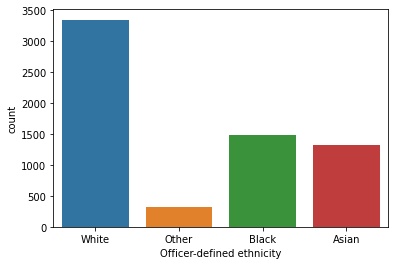

In [16]:
#count of different races stopped
sns.countplot(x="Officer-defined ethnicity", data = stop_search_df)



#count of black females and white females stopped 
#class of object of search in blacks and whites and type of outcome
#removal of more than just outer clothing

In [28]:
stop_search_df["Gender"].value_counts()

Male      6210
Female     670
Other        4
Name: Gender, dtype: int64

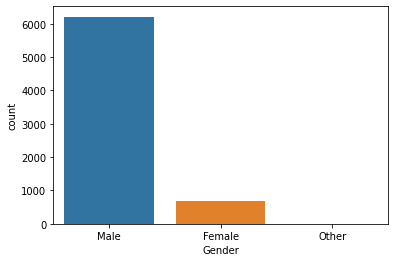

In [25]:
#count of different genders stopped
sns.countplot(x = "Gender", data = stop_search_df)

In [ ]:
#veil of darkness hypothesis

Hypothesis testing:


In [ ]:
#more blacks are stopped and frisked in london
#h0 = no racial bias
#h1 = bias exists


Modelling and prediction:


In [ ]:
# age, gender, race, object of serarch - features
# outcome - target
#keeping every feature constant and only by removing or adding the race variable will the outcome vary?

Detecting bias

In [ ]:
#bias in data
#bias in algorithm